<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [50]:
from sklearn.metrics import roc_auc_score

y_true = [0, 1, 1, 0, 1]

y_predictions = [0.1, 0.9, 0.4, 0.6, 0.61]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [51]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

sns.set()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [52]:
data = pd.read_csv('./train.csv')
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [96]:
# Числовые признаки

numeric_features = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки

categorical_features = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod']

features = numeric_features + categorical_features
target = 'Churn'

Посмотрим на случайные строки датафрейма

In [97]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.20,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.40,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.70,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


Посмотрим на описательные статистики признаков в датасете:

In [98]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ClientPeriod,5282.0,NaN,NaN,NaN,32.397009,24.550326,0.00,9.0000,29.00,55.00,72.00
MonthlySpending,5282.0,NaN,NaN,NaN,64.924754,30.176464,18.25,35.4625,70.40,90.05,118.75
TotalSpent,5273.0,NaN,NaN,NaN,2291.390461,2269.014233,18.80,401.1000,1410.25,3807.35,8684.80
Sex,5282,2,Male,2655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsSeniorCitizen,5282.0,NaN,NaN,NaN,0.159409,0.366092,0.00,0.0000,0.00,0.00,1.00
HasPartner,5282,2,No,2705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasChild,5282,2,No,3676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasPhoneService,5282,2,Yes,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasMultiplePhoneNumbers,5282,3,No,2511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasInternetService,5282,3,Fiber optic,2341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, есть ли в датасете незаполненные значения (missing values, NaN) с помощью методов pandas - isna(), info().

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [100]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Построим табличку с количеством NaN в каждом столбце датафрейма:

In [95]:
def missing_values_table(df: pd.DataFrame) -> pd.DataFrame:
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_res = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        return mis_val_table_res[
            mis_val_table_res.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

missing_values_table(data)

,Missing Values,% of Total Values
TotalSpent,9,0.2


Видим, что в нашем датасете практически отсутствуют пропущенные значения.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Посмотрим на распределение числовых признаков в датасете:

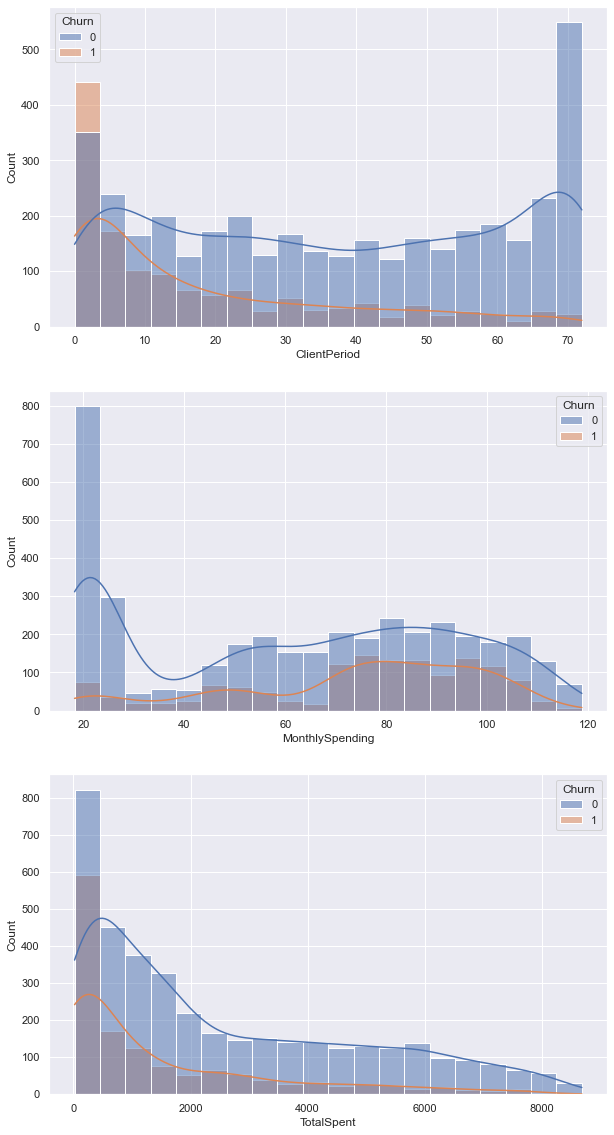

In [10]:
f, axes = plt.subplots(3, 1, figsize=(10, 20))
for ax, feature in zip(axes.flat, numeric_features):
    sns.histplot(data=data, x=feature, color='skyblue', hue='Churn', kde=True, alpha=0.5, bins=20, ax=ax)

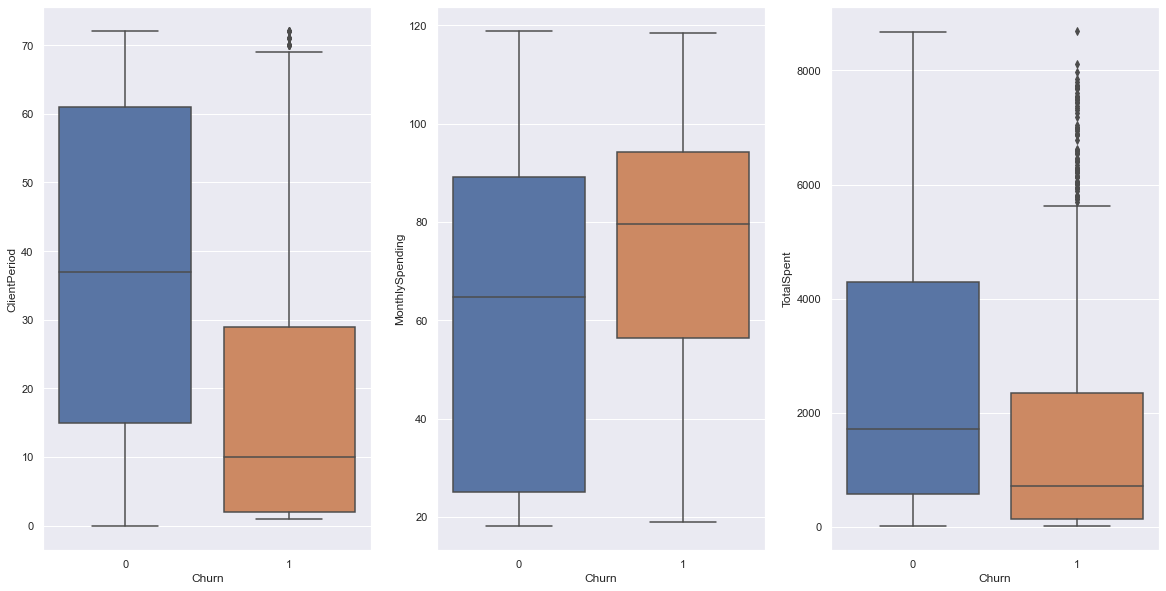

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))

ax = sns.boxplot(x='Churn', y='ClientPeriod', data=data, orient='v', ax=axes[0])
ax = sns.boxplot(x='Churn', y='MonthlySpending', data=data, orient='v', ax=axes[1])
ax = sns.boxplot(x='Churn', y='TotalSpent', data=data, orient='v', ax=axes[2])

Теперь, посмотрим на распределение категориальных признаков в датасете:

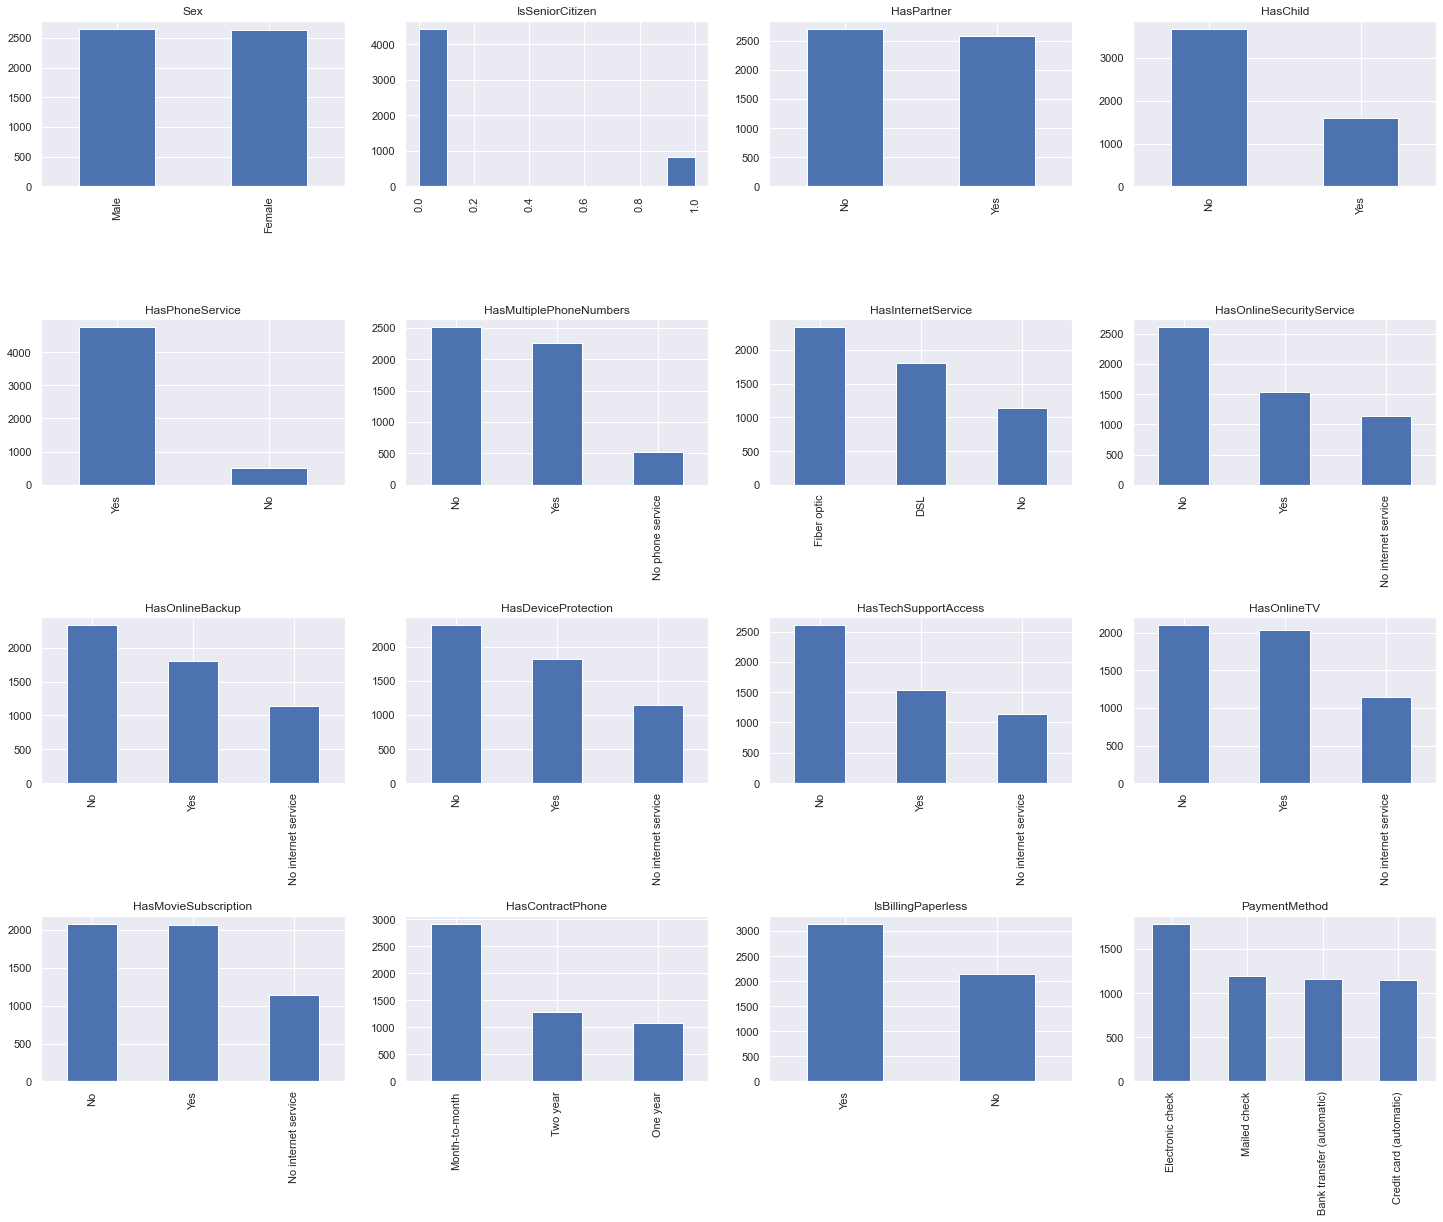

In [12]:
fig = plt.figure(figsize=(25, 25))

cols = 4
rows = np.ceil(float(data.shape[1]) / cols)

for i, column in enumerate(categorical_features):
    
    ax = fig.add_subplot(rows, cols, int(i+1))
    ax.set_title(column)
    
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind='bar', axes=ax)        
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
        
plt.subplots_adjust(hspace=0.8, wspace=0.2)

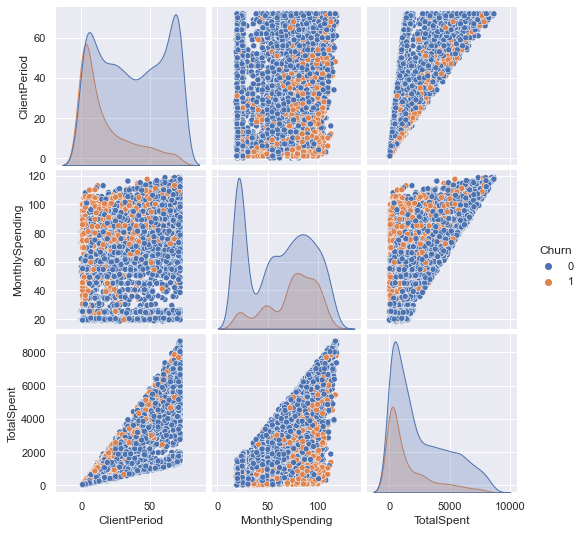

In [13]:
sns.pairplot(pd.concat([data[numeric_features], data['Churn']], axis=1), hue='Churn')

plt.show()

Посмотрим на распределение Target (целевой переменной) - Churn Rate:

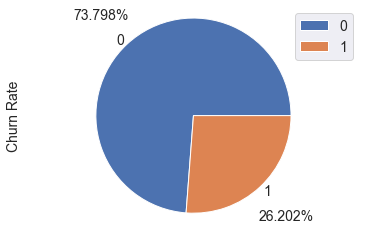

In [14]:
data[target].value_counts().plot(kind='pie',
                                       autopct='%.3f%%', pctdistance=1.4, labeldistance=1.05, fontsize=14)

plt.legend(fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.axis('equal')
plt.show()

Видим что классы в датасете несбалансированны.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [56]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(
    data[features], data[target], train_size=0.8, random_state=42)

Напишем пайплайн для обучения Логистической Регрессии на данных:

In [60]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


grid = np.array([100, 10, 1, 0.1, 0.01, 0.001])
parameters = {'logisticregression__C': grid}

categorical_encoder = Pipeline(steps=[('onehot', OneHotEncoder())])
numeric_encoder = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('numeric_encoder', numeric_encoder, numeric_features),
    ('categorical_encoder', categorical_encoder, categorical_features)])
    
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=200))

CV_model = GridSearchCV(pipeline, parameters, cv=10, 
                            scoring='roc_auc',
                            verbose=10)

X_train.fillna(X_train.mean(), inplace=True)

CV_model.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] logisticregression__C=100.0 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... logisticregression__C=100.0, score=0.827, total=   1.0s
[CV] logisticregression__C=100.0 .....................................
[CV] ......... logisticregression__C=100.0, score=0.829, total=   0.1s
[CV] logisticregression__C=100.0 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ......... logisticregression__C=100.0, score=0.860, total=   0.2s
[CV] logisticregression__C=100.0 .....................................
[CV] ......... logisticregression__C=100.0, score=0.819, total=   0.1s
[CV] logisticregression__C=100.0 .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV] ......... logisticregression__C=100.0, score=0.841, total=   0.2s
[CV] logisticregression__C=100.0 .....................................
[CV] ......... logisticregression__C=100.0, score=0.871, total=   0.1s
[CV] logisticregression__C=100.0 .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s remaining:    0.0s


[CV] ......... logisticregression__C=100.0, score=0.873, total=   0.2s
[CV] logisticregression__C=100.0 .....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s


[CV] ......... logisticregression__C=100.0, score=0.853, total=   0.3s
[CV] logisticregression__C=100.0 .....................................
[CV] ......... logisticregression__C=100.0, score=0.854, total=   0.2s
[CV] logisticregression__C=100.0 .....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s


[CV] ......... logisticregression__C=100.0, score=0.868, total=   0.3s
[CV] logisticregression__C=10.0 ......................................
[CV] .......... logisticregression__C=10.0, score=0.828, total=   0.2s
[CV] logisticregression__C=10.0 ......................................
[CV] .......... logisticregression__C=10.0, score=0.828, total=   0.3s
[CV] logisticregression__C=10.0 ......................................
[CV] .......... logisticregression__C=10.0, score=0.859, total=   0.2s
[CV] logisticregression__C=10.0 ......................................
[CV] .......... logisticregression__C=10.0, score=0.819, total=   0.1s
[CV] logisticregression__C=10.0 ......................................
[CV] .......... logisticregression__C=10.0, score=0.842, total=   0.3s
[CV] logisticregression__C=10.0 ......................................
[CV] .......... logisticregression__C=10.0, score=0.871, total=   0.2s
[CV] logisticregression__C=10.0 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.3s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric_encoder',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('categorical_encoder',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                     

In [62]:
print('Tuned hyperparameters: (best parameters) ', CV_model.best_params_)
print('ROC-AUC :', CV_model.best_score_)

Tuned hyperparameters: (best parameters)  {'logisticregression__C': 10.0}
ROC-AUC : 0.8494661241807545


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [77]:
%%time

import catboost

boosting_model = catboost.CatBoostClassifier(cat_features=categorical_features, eval_metric='AUC')
boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_valid, y_test_predicted)

Learning rate set to 0.019062
0:	total: 27.5ms	remaining: 27.5s
1:	total: 50.1ms	remaining: 25s
2:	total: 73.7ms	remaining: 24.5s
3:	total: 96.7ms	remaining: 24.1s
4:	total: 113ms	remaining: 22.4s
5:	total: 124ms	remaining: 20.5s
6:	total: 131ms	remaining: 18.5s
7:	total: 135ms	remaining: 16.7s
8:	total: 142ms	remaining: 15.6s
9:	total: 146ms	remaining: 14.5s
10:	total: 153ms	remaining: 13.7s
11:	total: 159ms	remaining: 13.1s
12:	total: 166ms	remaining: 12.6s
13:	total: 174ms	remaining: 12.2s
14:	total: 180ms	remaining: 11.8s
15:	total: 187ms	remaining: 11.5s
16:	total: 194ms	remaining: 11.2s
17:	total: 204ms	remaining: 11.1s
18:	total: 214ms	remaining: 11s
19:	total: 229ms	remaining: 11.2s
20:	total: 236ms	remaining: 11s
21:	total: 243ms	remaining: 10.8s
22:	total: 250ms	remaining: 10.6s
23:	total: 258ms	remaining: 10.5s
24:	total: 264ms	remaining: 10.3s
25:	total: 270ms	remaining: 10.1s
26:	total: 273ms	remaining: 9.82s
27:	total: 280ms	remaining: 9.72s
28:	total: 287ms	remaining: 9.

244:	total: 2.03s	remaining: 6.25s
245:	total: 2.04s	remaining: 6.26s
246:	total: 2.05s	remaining: 6.25s
247:	total: 2.05s	remaining: 6.23s
248:	total: 2.06s	remaining: 6.22s
249:	total: 2.07s	remaining: 6.22s
250:	total: 2.08s	remaining: 6.2s
251:	total: 2.08s	remaining: 6.18s
252:	total: 2.09s	remaining: 6.17s
253:	total: 2.1s	remaining: 6.15s
254:	total: 2.1s	remaining: 6.14s
255:	total: 2.11s	remaining: 6.12s
256:	total: 2.11s	remaining: 6.11s
257:	total: 2.12s	remaining: 6.1s
258:	total: 2.13s	remaining: 6.09s
259:	total: 2.13s	remaining: 6.08s
260:	total: 2.14s	remaining: 6.05s
261:	total: 2.14s	remaining: 6.04s
262:	total: 2.14s	remaining: 6.01s
263:	total: 2.15s	remaining: 5.99s
264:	total: 2.15s	remaining: 5.98s
265:	total: 2.16s	remaining: 5.96s
266:	total: 2.17s	remaining: 5.95s
267:	total: 2.18s	remaining: 5.95s
268:	total: 2.18s	remaining: 5.93s
269:	total: 2.18s	remaining: 5.91s
270:	total: 2.19s	remaining: 5.9s
271:	total: 2.19s	remaining: 5.87s
272:	total: 2.2s	remainin

499:	total: 4.05s	remaining: 4.05s
500:	total: 4.06s	remaining: 4.04s
501:	total: 4.07s	remaining: 4.04s
502:	total: 4.08s	remaining: 4.03s
503:	total: 4.09s	remaining: 4.03s
504:	total: 4.1s	remaining: 4.01s
505:	total: 4.11s	remaining: 4.01s
506:	total: 4.11s	remaining: 4s
507:	total: 4.12s	remaining: 3.99s
508:	total: 4.13s	remaining: 3.98s
509:	total: 4.14s	remaining: 3.97s
510:	total: 4.14s	remaining: 3.96s
511:	total: 4.15s	remaining: 3.96s
512:	total: 4.16s	remaining: 3.95s
513:	total: 4.17s	remaining: 3.94s
514:	total: 4.17s	remaining: 3.93s
515:	total: 4.18s	remaining: 3.92s
516:	total: 4.19s	remaining: 3.91s
517:	total: 4.19s	remaining: 3.9s
518:	total: 4.2s	remaining: 3.89s
519:	total: 4.21s	remaining: 3.88s
520:	total: 4.22s	remaining: 3.88s
521:	total: 4.22s	remaining: 3.87s
522:	total: 4.23s	remaining: 3.86s
523:	total: 4.24s	remaining: 3.85s
524:	total: 4.25s	remaining: 3.84s
525:	total: 4.25s	remaining: 3.83s
526:	total: 4.27s	remaining: 3.83s
527:	total: 4.28s	remainin

746:	total: 6.5s	remaining: 2.2s
747:	total: 6.51s	remaining: 2.19s
748:	total: 6.51s	remaining: 2.18s
749:	total: 6.53s	remaining: 2.18s
750:	total: 6.54s	remaining: 2.17s
751:	total: 6.55s	remaining: 2.16s
752:	total: 6.56s	remaining: 2.15s
753:	total: 6.56s	remaining: 2.14s
754:	total: 6.57s	remaining: 2.13s
755:	total: 6.58s	remaining: 2.12s
756:	total: 6.58s	remaining: 2.11s
757:	total: 6.59s	remaining: 2.1s
758:	total: 6.6s	remaining: 2.1s
759:	total: 6.61s	remaining: 2.09s
760:	total: 6.62s	remaining: 2.08s
761:	total: 6.62s	remaining: 2.07s
762:	total: 6.63s	remaining: 2.06s
763:	total: 6.64s	remaining: 2.05s
764:	total: 6.65s	remaining: 2.04s
765:	total: 6.65s	remaining: 2.03s
766:	total: 6.66s	remaining: 2.02s
767:	total: 6.67s	remaining: 2.01s
768:	total: 6.68s	remaining: 2s
769:	total: 6.68s	remaining: 2s
770:	total: 6.69s	remaining: 1.99s
771:	total: 6.7s	remaining: 1.98s
772:	total: 6.71s	remaining: 1.97s
773:	total: 6.71s	remaining: 1.96s
774:	total: 6.73s	remaining: 1.9

990:	total: 8.75s	remaining: 79.5ms
991:	total: 8.77s	remaining: 70.7ms
992:	total: 8.79s	remaining: 62ms
993:	total: 8.8s	remaining: 53.1ms
994:	total: 8.82s	remaining: 44.3ms
995:	total: 8.83s	remaining: 35.5ms
996:	total: 8.86s	remaining: 26.7ms
997:	total: 8.9s	remaining: 17.8ms
998:	total: 8.92s	remaining: 8.93ms
999:	total: 8.94s	remaining: 0us
CPU times: user 24.4 s, sys: 2.16 s, total: 26.5 s
Wall time: 10.5 s


In [78]:
print('Catboost, train ROC-AUC:', train_auc)
print('Catboost, valid ROC-AUC:', test_auc)

Catboost, train ROC-AUC: 0.8953653945050085
Catboost, valid ROC-AUC: 0.8265946934365216


Используем Grid Search для нахождения оптимальных гиперпараметров модели Catboost:

In [83]:
%%time

cat_boost_clf = catboost.CatBoostClassifier(cat_features=categorical_features)

params = {
    "iterations": [100, 200, 400, 600, 800, 1000],
    "learning_rate": [1e-1, 5e-1, 1e-2,]
}

X, y = data[features], data[target]

cv_catboost_search = GridSearchCV(cat_boost_clf, param_grid=params, scoring="roc_auc", n_jobs=-1)
cv_catboost_search.fit(X, y)

0:	learn: 0.6580890	total: 4.1ms	remaining: 406ms
1:	learn: 0.6274387	total: 8.71ms	remaining: 427ms
2:	learn: 0.6015111	total: 11.9ms	remaining: 383ms
3:	learn: 0.5811074	total: 15.5ms	remaining: 373ms
4:	learn: 0.5621379	total: 18.8ms	remaining: 357ms
5:	learn: 0.5464927	total: 21.8ms	remaining: 342ms
6:	learn: 0.5324701	total: 24.8ms	remaining: 330ms
7:	learn: 0.5203300	total: 28.2ms	remaining: 324ms
8:	learn: 0.5088479	total: 31.3ms	remaining: 316ms
9:	learn: 0.4984414	total: 34.4ms	remaining: 310ms
10:	learn: 0.4887516	total: 37.7ms	remaining: 305ms
11:	learn: 0.4810019	total: 41ms	remaining: 301ms
12:	learn: 0.4739382	total: 44.3ms	remaining: 297ms
13:	learn: 0.4681774	total: 47.7ms	remaining: 293ms
14:	learn: 0.4624706	total: 50.9ms	remaining: 288ms
15:	learn: 0.4577569	total: 54ms	remaining: 284ms
16:	learn: 0.4534815	total: 58.1ms	remaining: 284ms
17:	learn: 0.4495072	total: 62.6ms	remaining: 285ms
18:	learn: 0.4452288	total: 66.3ms	remaining: 283ms
19:	learn: 0.4421041	total:

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fce0f873190>,
             n_jobs=-1,
             param_grid={'iterations': [100, 200, 400, 600, 800, 1000],
                         'learning_rate': [0.1, 0.5, 0.01]},
             scoring='roc_auc')

In [84]:
cv_catboost_search.best_score_

0.8474771067766541

In [85]:
cv_catboost_search.best_params_

{'iterations': 100, 'learning_rate': 0.1}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [87]:
cat_boost_clf_best = catboost.CatBoostClassifier(cat_features=categorical_features, **cv_catboost_search.best_params_)
cat_boost_clf_best.fit(X, y)

0:	learn: 0.6580890	total: 12ms	remaining: 1.19s
1:	learn: 0.6274387	total: 25ms	remaining: 1.23s
2:	learn: 0.6015111	total: 31.3ms	remaining: 1.01s
3:	learn: 0.5811074	total: 36.9ms	remaining: 886ms
4:	learn: 0.5621379	total: 40.9ms	remaining: 778ms
5:	learn: 0.5464927	total: 44.4ms	remaining: 696ms
6:	learn: 0.5324701	total: 48ms	remaining: 637ms
7:	learn: 0.5203300	total: 50.9ms	remaining: 585ms
8:	learn: 0.5088479	total: 54ms	remaining: 546ms
9:	learn: 0.4984414	total: 56.9ms	remaining: 512ms
10:	learn: 0.4887516	total: 59.7ms	remaining: 483ms
11:	learn: 0.4810019	total: 62.8ms	remaining: 461ms
12:	learn: 0.4739382	total: 65.8ms	remaining: 440ms
13:	learn: 0.4681774	total: 68.6ms	remaining: 421ms
14:	learn: 0.4624706	total: 71.5ms	remaining: 405ms
15:	learn: 0.4577569	total: 74.5ms	remaining: 391ms
16:	learn: 0.4534815	total: 77.4ms	remaining: 378ms
17:	learn: 0.4495072	total: 80.4ms	remaining: 366ms
18:	learn: 0.4452288	total: 83.4ms	remaining: 356ms
19:	learn: 0.4421041	total: 85

In [91]:
best_model = cat_boost_clf_best

In [92]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=None)

In [93]:
submission

,Id,Churn
0,0,0.038694
1,1,0.705489
2,2,0.689940
3,3,0.015275
4,4,0.008226
...,...,...
1756,1756,0.115494
1757,1757,0.015077
1758,1758,0.837248
1759,1759,0.550093


### Имя в Kaggle - Paul Tsvetov
### Score - 0.85271
	

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.